<a href="https://colab.research.google.com/github/lephuocdat2000/-CS114.K21-/blob/master/Timing_Complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [0]:
!wget https://cs.uit.edu.vn/data.txt

--2020-06-10 07:41:32--  https://cs.uit.edu.vn/data.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 118.69.123.142
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|118.69.123.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84410 (82K) [text/plain]
Saving to: ‘data.txt’

data.txt            100%[===================>]  82.43K  --.-KB/s    in 0.04s   

2020-06-10 07:41:32 (2.12 MB/s) - ‘data.txt’ saved [84410/84410]



In [0]:
!ls

data.txt  sample_data


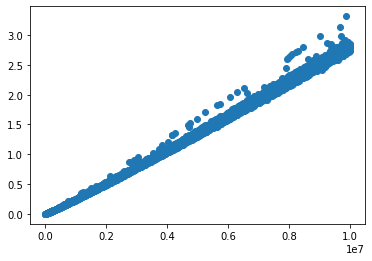

In [0]:
data=pd.read_csv('data.txt',header=None)
data.columns=['Complexity','Timing']
plt.scatter(data['Complexity'],data['Timing'])

In [0]:
data=data.assign(Square=np.power(data['Complexity'],2),Logarit=np.log2(data['Complexity'],where=(data['Complexity']!=0))*data['Complexity'])
data=data[['Complexity','Square','Logarit','Timing']]
data

,Complexity,Square,Logarit,Timing
0,4032139,16258144915321,8.847769e+07,1.200580
1,2055486,4225022696196,4.310570e+07,0.509774
2,5626651,31659201475801,1.261712e+08,1.476080
3,42065,1769464225,6.461324e+05,0.007651
4,6297788,39662133692944,1.422444e+08,1.661560
...,...,...,...,...
5206,6600098,43561293609604,1.495190e+08,1.804520
5207,5339132,28506330513424,1.193198e+08,1.450310
5208,4794647,22988639854609,1.064076e+08,1.293070
5209,4440131,19714763297161,9.804773e+07,1.196530


In [0]:
x=data[['Complexity','Square','Logarit']]
y=data[['Timing']]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,)
#check missingdata
all_data_na=(data.isnull().sum())/len(data)*100
all_data_na

Complexity    0.0
Square        0.0
Logarit       0.0
Timing        0.0
dtype: float64

Slope:  [[ 1.12303082e-08 -6.56888747e-17  1.16440451e-08]]
Intercept:  [0.00016453]


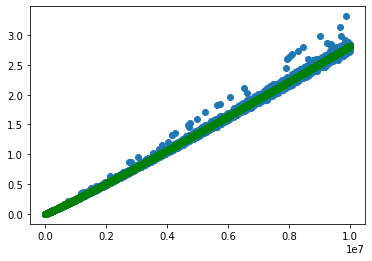

In [0]:
model=LinearRegression().fit(X_train.values,y_train.values)
print("Slope: ",model.coef_)
print("Intercept: ",model.intercept_)
y_fit=model.predict(X_train.values)
plt.scatter(X_train['Complexity'],y_train)
plt.plot(X_train['Complexity'],y_fit,'go')


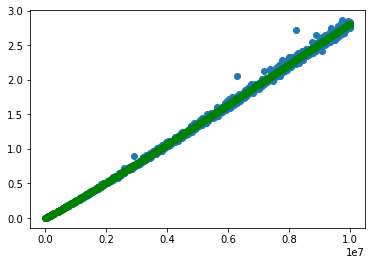

In [0]:
y_predict=model.predict(X_test.values)
plt.scatter(X_test['Complexity'].values,y_test.values)
plt.plot(X_test['Complexity'].values,y_predict,'go')

In [0]:
def Prediction(x,train=X_train,model=model):
   squarex=np.power(x,2)
   log2x=np.log2(x,where=(x!=0))*x
   arr=np.array([[x,squarex,log2x]])
   pred=model.predict(arr)
   print("Thoi gian du tinh cua thuat toan voi do phuc tap ",x," la: ",pred[0][0])
Prediction(4683236)

Thoi gian du tinh cua thuat toan voi do phuc tap  4683236  la:  1.2596924354680823


In [0]:
X_test

,Complexity,Square,Logarit
871,2843330,8084525488900,6.095858e+07
4347,9202601,84687865165201,2.128894e+08
1865,4683236,21932699431696,1.037762e+08
1518,3646190,13294701516100,7.947950e+07
3555,7238242,52392147250564,1.649393e+08
...,...,...,...
188,6623079,43865175440241,1.500728e+08
3168,6035393,36425968664449,1.359473e+08
2946,5636284,31767697328656,1.264011e+08
1533,734772,539889891984,1.431846e+07


In [0]:
y_test

,Timing
871,0.739974
4347,2.519840
1865,1.264280
1518,0.929134
3555,2.021750
...,...
188,1.776360
3168,1.660950
2946,1.512500
1533,0.178244
